###   *Projet d'analyse des donnee pour l'entreprise Innova Electronic*


#### Presente par : *TCHUENKAM Nick*

In [147]:
#importation des bibliotheques
import numpy as np #pour les operations numeriques
import pandas as pd #pour la manipulation des donnees tabulaires
import matplotlib.pyplot as plt #pour la visualisation des donnees

In [148]:
#chargement des donnees
donnees = pd.read_csv("ventes-data.csv", sep = ",")

In [149]:
#affichage des donnees
print(donnees)

        Month           Product  Units Sold  Revenue
0     January        Smartphone        1000    50000
1     January            Laptop         500   100000
2     January            Tablet         300    45000
3     January          Smart TV         200    25000
4     January        Headphones         800    32000
..        ...               ...         ...      ...
583  December   Graphics Tablet         315    15750
584  December    Ink Cartridges         525    26250
585  December      Laptop Stand         210    10500
586  December  Portable Scanner         315    15750
587  December    Screen Cleaner         420     6300

[588 rows x 4 columns]


## Explorations des données pour comprendre leur structure et leur contenu.


In [150]:
# Obtenir des informations sur les donnees
print(donnees.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       588 non-null    object
 1   Product     588 non-null    object
 2   Units Sold  588 non-null    int64 
 3   Revenue     588 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 18.5+ KB
None


INTERPRETATION : Notre dataFrame comporte 588 lignes (de 0 a 587) et 4 colonnes (de 0 a 3: Month, Product, Units Sold, Revenue).
Nature de "Month" et "Product" sont des objects (chaines de caracteres) et  "Units Sold" et "Revenue" sont des int64 (reels).
Il n'ya aucune valeur manquantes. Pour plus de verification, on a :

In [151]:
# Obtenir une statistiquqe descriptive pour chaque collonne numerique
print(donnees.describe())

        Units Sold        Revenue
count   588.000000     588.000000
mean    489.673469   31221.428571
std     343.815948   27426.671012
min     100.000000    3000.000000
25%     255.000000   12400.000000
50%     382.500000   24000.000000
75%     600.000000   41337.500000
max    2100.000000  210000.000000


In [152]:
# Verifier si une colonne  a des y'a valeurs manquantes 
print(donnees.isnull().sum()) #ou alors "isna()"

Month         0
Product       0
Units Sold    0
Revenue       0
dtype: int64


CONCLUSION : Le DataFrame ne contient pas de donnees manquantes

## Analyse des donnees

**Calcul des ventes totales pour chaque mois.**

           Revenue
Month             
January     987000
February   1085700
March      1184400
April      1283100
May        1381800
June       1480500
July       1579200
August     1677900
September  1776600
October    1875300
November   1974000
December   2072700


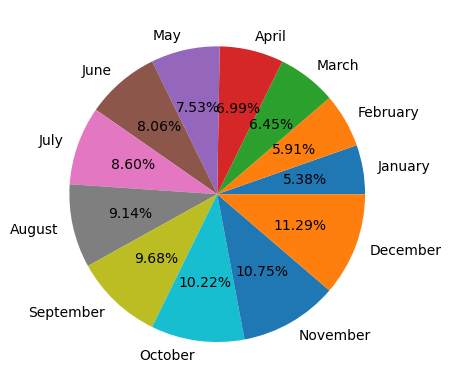

In [229]:
#Calcul des ventes par mois.
ventes_mensuelles = donnees.groupby("Month")[["Revenue"]].sum().sort_values(["Revenue"]) #grouper les mois et calculer les ventes totales
print(ventes_mensuelles)

#Generation du graphique
ventes_mensuelles = ventes_mensuelles.reset_index()
plt.pie(ventes_mensuelles['Revenue'],labels=ventes_mensuelles['Month'], autopct='%.2f%%')
plt.show()

**Evolution des ventes dans le temps**

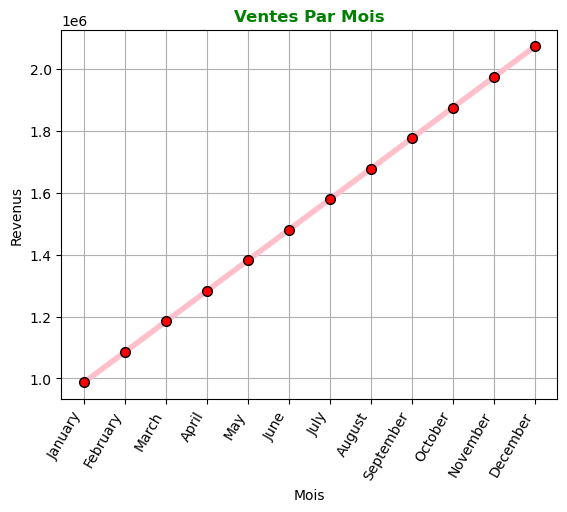

In [261]:
# ventes par mois
mois = ventes_mensuelles["Month"].tolist() 
vente =  ventes_mensuelles["Revenue"].tolist()
plt.plot(mois, vente, c="pink", lw = 4, marker = "o", ms = 7, mec = "black", mfc = "red") 
#c = couleur de la ligne, lw = epaisseur de la ligne
#ms = taille du marqueur, mec = contour du marqueur, mfc= couleur du marqueur les 1eres lettres des couleurs en anglais ou alors on ecrit la couleur entiere

plt.title("Ventes Par Mois", fontweight = "bold", c = "green") #titre du graphique
plt.xlabel("Mois")
plt.ylabel("Revenus")
plt.xticks(rotation = 60, ha = "right")
plt.grid() #mettre une grille
plt.show()

**Identification des 5 produits les plus vendus chaque mois.**


Month      Product   
April      Smartphone    1300
           Headphones    1040
           Power Bank    1040
           Monitor        910
           USB Cable      910
August     Smartphone    1700
           Headphones    1360
           Power Bank    1360
           Monitor       1190
           USB Cable     1190
December   Smartphone    2100
           Headphones    1680
           Power Bank    1680
           Monitor       1470
           USB Cable     1470
February   Smartphone    1100
           Headphones     880
           Power Bank     880
           Monitor        770
           USB Cable      770
January    Smartphone    1000
           Headphones     800
           Power Bank     800
           Monitor        700
           USB Cable      700
July       Smartphone    1600
           Headphones    1280
           Power Bank    1280
           Monitor       1120
           USB Cable     1120
June       Smartphone    1500
           Headphones    1200
           Power B

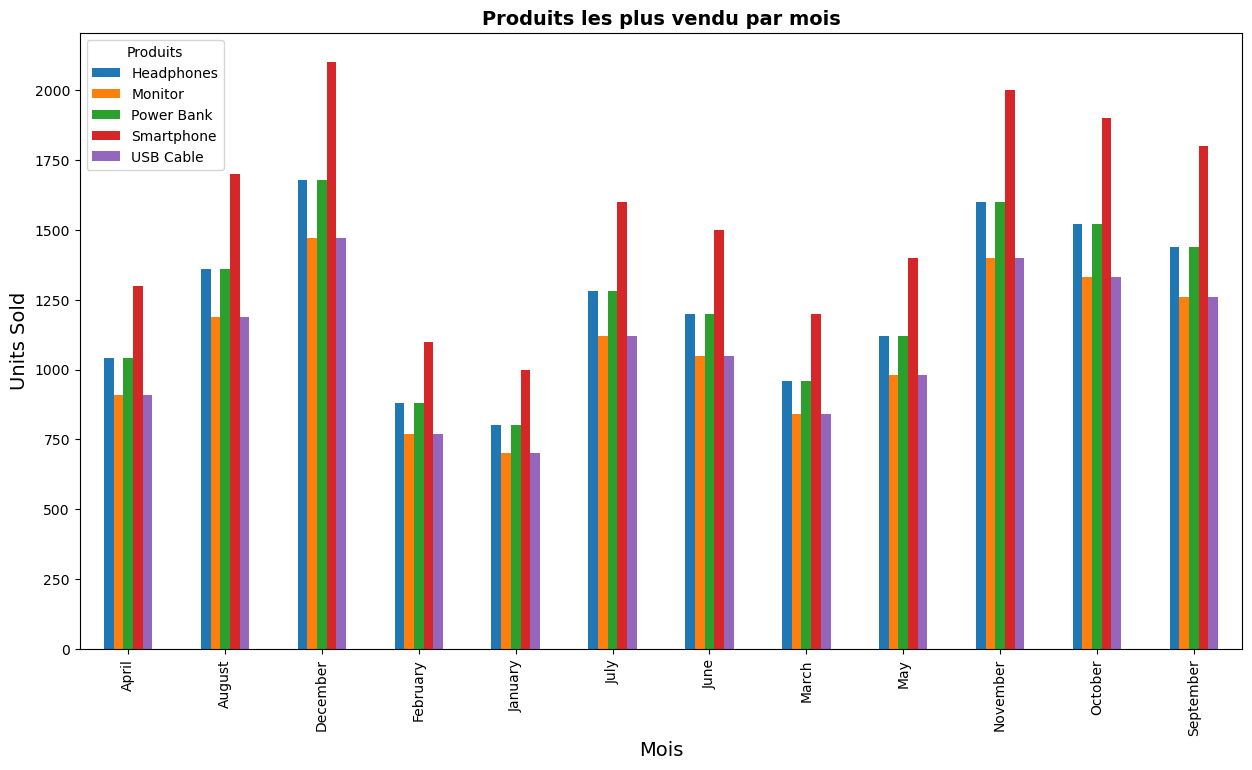

In [262]:
#Identification des 5 produits les plus vendus chaque mois.

Nbre_ventes_mensuelles_par_produit = donnees.groupby(["Month", "Product"]) #grouper les ventes par mois et produits.
Nbre_ventes_mensuelles_par_produit = Nbre_ventes_mensuelles_par_produit["Units Sold"].sum() #nbre de ventes par mois et produits.

top5_produit_par_mois = Nbre_ventes_mensuelles_par_produit.groupby("Month", group_keys = False).nlargest(5)
print(top5_produit_par_mois)

#Generation du graphe des top5 par mois

top5_produit_par_mois.unstack().plot(kind="bar", stacked=False, figsize=(15, 8))
plt.xlabel("Mois", size = 14)
plt.ylabel("Units Sold", size = 14)
plt.title("Produits les plus vendu par mois", size = 14, weight = "bold")
plt.legend(title = "Produits")
plt.show()

**Mois avec les ventes les plus élevées et les plus basses**

In [238]:
# Mois avec les ventes les plus élevées.
print(ventes_mensuelles)

        Month  Revenue
0     January   987000
1    February  1085700
2       March  1184400
3       April  1283100
4         May  1381800
5        June  1480500
6        July  1579200
7      August  1677900
8   September  1776600
9     October  1875300
10   November  1974000
11   December  2072700


In [242]:
mois_max_ventes = ventes_mensuelles.max()
mois_min_ventes = ventes_mensuelles.min()
print("Le mois avec les ventes les plus elevees est : ", mois_max_ventes)
print("Le mois avec les ventes les plus elevees est : ", mois_min_ventes)

Le mois avec les ventes les plus elevees est :  Month      September
Revenue      2072700
dtype: object
Le mois avec les ventes les plus elevees est :  Month       April
Revenue    987000
dtype: object


Month
December     32508
November     30960
October      29412
September    27864
August       26316
July         24768
June         23220
May          21672
April        20124
March        18576
Name: Units Sold, dtype: int64


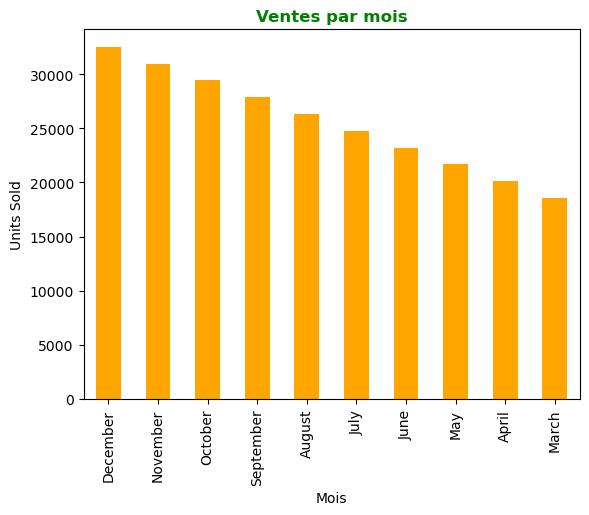

In [264]:
# Nombres de ventes par mois
ventes_par_mois = donnees.groupby("Month")["Units Sold"].sum().nlargest(10)
print(ventes_par_mois)
ventes_par_mois.plot(kind="bar", color= "Orange") 
plt.title("Ventes par mois", fontweight = "bold", color = "green")
plt.xlabel("Mois")
plt.ylabel("Units Sold")
plt.show()

Product
Smartphone          18600
Headphones          14880
Power Bank          14880
Monitor             13020
USB Cable           13020
Wireless Speaker    11160
Keyboard            10230
Car Charger          9300
Laptop               9300
Mouse                8370
Name: Units Sold, dtype: int64


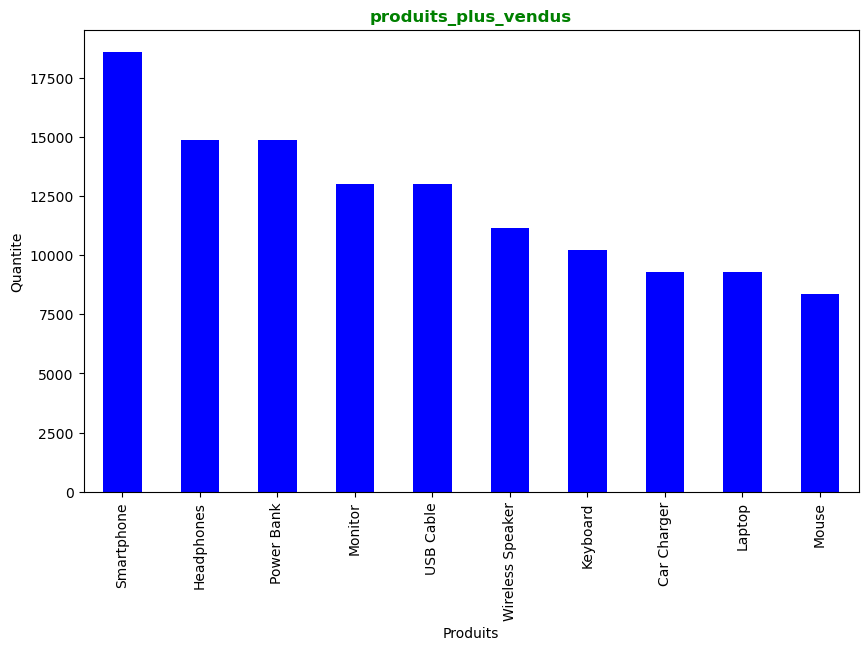

In [265]:
# Produits les Plus vendus
produits_plus_vendus = donnees.groupby("Product")["Units Sold"].sum().nlargest(10)
print(produits_plus_vendus)
produits_plus_vendus.plot(kind="bar", color= "blue", figsize=(10, 6)) 
plt.title("produits_plus_vendus", fontweight = "bold", color = "green")
plt.xlabel("Produits")
plt.ylabel("Quantite")
plt.show()

### Tendances des ventes des produits les plus vendus

**Calcul des ventes totales pour chaque produit.**

                     Units Sold
Product                        
Wireless Mouse             1860
VR Headset                 1860
Wi-Fi Extender             1860
Projector                  1860
Laptop Stand               1860
SD Card                    2790
Portable Scanner           2790
Drone                      2790
External Hard Drive        2790
Network Switch             2790
Graphics Tablet            2790
Laser Printer              2790
Graphics Card              3348
SSD                        3720
Screen Cleaner             3720
Microphone                 3720
Smart TV                   3720
Compact Camera             3720
Bluetooth Adapter          3720
Battery Charger            3720
Smart Home Hub             3720
Ink Cartridges             4650
Mechanical Keyboard        4650
Surge Protector            4650
Game Console               4650
Printer                    4650
USB Flash Drive            4650
Smart Thermostat           5580
Webcam                     5580
Tablet  

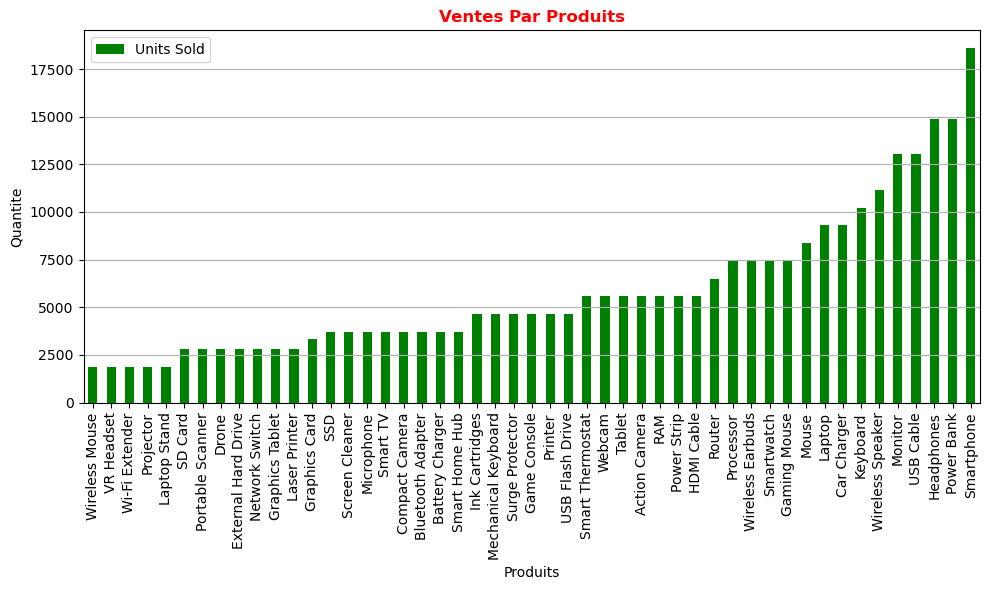

In [266]:
# Chargement des Produits les Plus vendus
Qte_produits_vendu = donnees.groupby(["Product"])[["Units Sold"]].sum().sort_values(["Units Sold"]) #grouper les produits et calculer le total des ventes
print(Qte_produits_vendu)
#Generation du graphe des ventes par Produits
Qte_produits_vendu.plot(kind="bar", color= "green",figsize=(10, 6))
plt.title("Ventes Par Produits", fontweight = "bold", color = "red")
plt.xlabel("Produits")
plt.ylabel("Quantite")
plt.grid(axis="y") #mettre une grille horizontale
plt.tight_layout()  # Ajuster la mise en page pour éviter les chevauchements
plt.show()

Product
Laptop              1860000
Smartphone           930000
Tablet               837000
Monitor              781200
Processor            744000
Smart Home Hub       744000
Game Console         697500
Wireless Speaker     669600
Headphones           595200
Drone                558000
Name: Revenue, dtype: int64


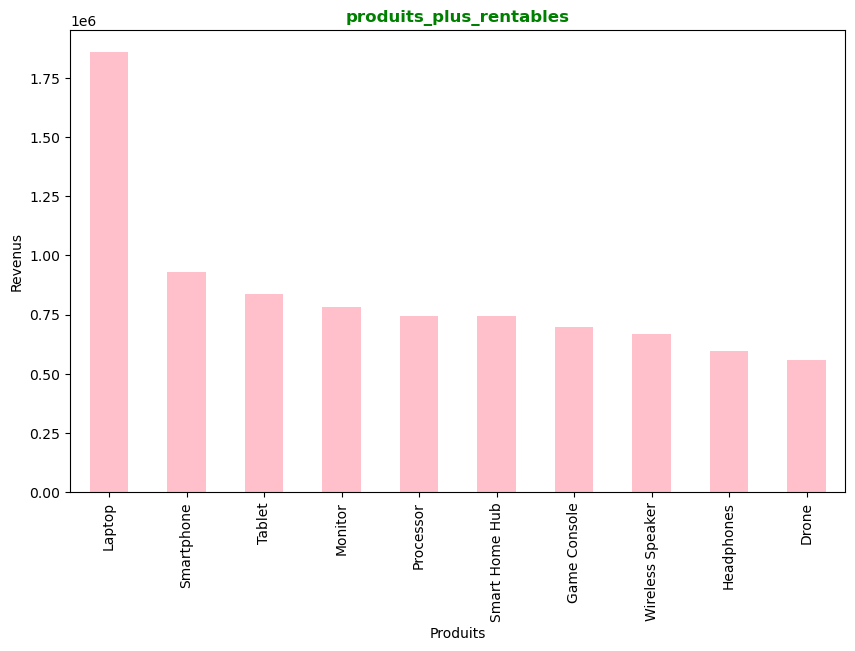

In [250]:
# Chargement des Produits les Plus vendus
produits_plus_rentables =  donnees.groupby("Product")["Revenue"].sum().nlargest(10) #grouper les produits et calculer le total des ventes
print(produits_plus_rentables)

#Generation du graphique
produits_plus_rentables.plot(kind="bar", color= "pink", figsize=(10, 6)) 
plt.title("produits_plus_rentables", fontweight = "bold", color = "green")
plt.xlabel("Produits")
plt.ylabel("Revenus")
plt.show()

Month      Product   
April      Laptop        130000
           Smartphone     65000
           Tablet         58500
           Monitor        54600
           Processor      52000
August     Laptop        170000
           Smartphone     85000
           Tablet         76500
           Monitor        71400
           Processor      68000
December   Laptop        210000
           Smartphone    105000
           Tablet         94500
           Monitor        88200
           Processor      84000
February   Laptop        110000
           Smartphone     55000
           Tablet         49500
           Monitor        46200
           Processor      44000
January    Laptop        100000
           Smartphone     50000
           Tablet         45000
           Monitor        42000
           Processor      40000
July       Laptop        160000
           Smartphone     80000
           Tablet         72000
           Monitor        67200
           Processor      64000
June       Laptop 

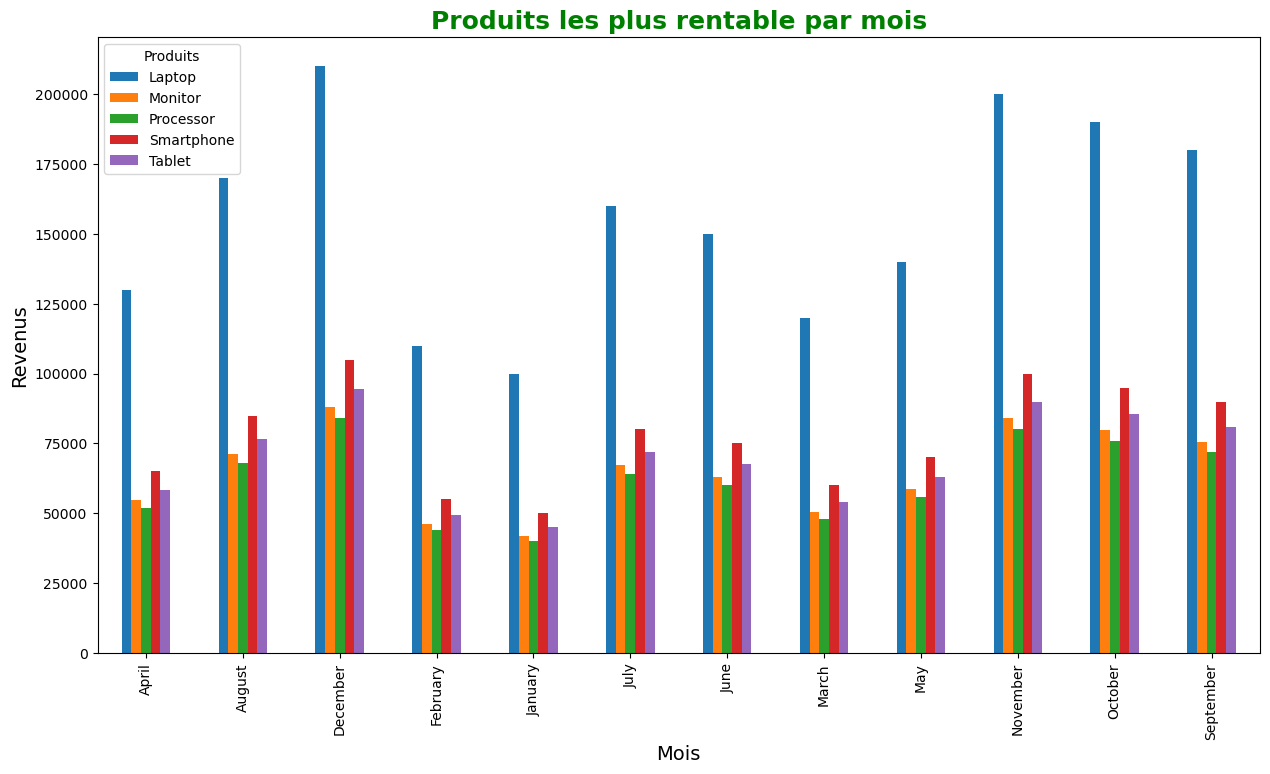

In [255]:
#Identification des 5 produits les plus vendus chaque mois.

Revenu_mensuel_par_produit = donnees.groupby(["Month", "Product"]) #grouper les ventes par mois et produits.
Revenu_mensuel_par_produit = Revenu_mensuel_par_produit["Revenue"].sum() #Revenu mensuel par mois et produits.

top5_ventes_par_mois = Revenu_mensuel_par_produit.groupby("Month", group_keys = False).nlargest(5)
print(top5_ventes_par_mois)

#Generation du graphe des top5 par mois

top5_ventes_par_mois.unstack().plot(kind="bar", stacked=False, figsize=(15, 8))
plt.xlabel("Mois", size = 14)
plt.ylabel("Revenus", size = 14)
plt.title("Produits les plus rentable par mois", size = 18, weight = "bold", color = "green")
plt.legend(title = "Produits")
plt.show()